In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LightSource
import seaborn as sns

from pysheds.grid import Grid

In [2]:
!ls ./measurements/

Infiltration (after monsoon).csv  Springs (before monsoon).csv
Permeability (after monsoon).csv  Streams_Tributaries (after monsoon).csv
Springs (after monsoon).csv	  Streams_Tributaries (before monsoon).csv


In [3]:
infil = pd.read_csv('./measurements/Infiltration (after monsoon).csv', delimiter=';', encoding='latin1')

In [4]:
infil

,Date,Site,Designation,ID,X,Y,Elevation (m),Change in water level per minute (cm/min),IC (cm/min),IC (cm/h),...,IC (m/j),IC (mm/min),IC (mm/h),IC (mm/y),VWC (%),PER (µS),Landform,Vegetation,Lithology,Description
0,08.11.2022,Listi village,I4,Listi village,85.871490,27.893090,2297.0,1.03,0.45,26.91,...,6.5,4.5,269.1,2.4,NaN,NaN,fresh plotted terrace,NaN,NaN,NaN
1,08.11.2022,Listi road,I1,Listi road 1,85.864010,27.894220,NaN,0.35,0.15,9.19,...,2.2,1.5,91.9,0.8,NaN,NaN,ridge,NaN,NaN,NaN
2,08.11.2022,Listi road,I2,Listi_ridge,85.864140,27.894670,NaN,0.16,0.07,4.27,...,1.0,0.7,42.7,0.4,17.4\n17.0,1.389\n1.382,ridge,NaN,NaN,NaN
3,08.11.2022,Listi road,I3,Listi road 3,85.863694,27.894081,2338.0,0.16,0.07,4.07,...,1.0,0.7,40.7,0.4,NaN,NaN,ridge,NaN,NaN,NaN
4,09.11.2022,Gumba tophill,NaN,Gumba tophill,85.877600,27.909850,2941.0,6.20,2.71,162.75,...,39.1,27.1,1627.5,14.3,23.2,1.475,tophill,forest dense,NaN,Manip non validée
5,09.11.2022,Gumba midpoint ERT,NaN,Gumba midpoint ERT,85.877200,27.909570,2933.0,0.30,0.13,7.88,...,1.9,1.3,78.8,0.7,32.1\n30.0,1.613\n1.579,downhill on ridge,"grass, bushes, trees",fractures from Ghorka earthquake,NaN
6,09.11.2022,Meadow,M3,Meadow 3,85.873874,27.909324,NaN,0.18,0.08,4.59,...,1.1,0.8,45.9,0.4,31.9\n21.8\n32.9\n22.0\n24.6,1.611\n1.453\n1.627\n1.457\n1.497,meadow,"trees, bushes",NaN,NaN
7,09.11.2022,Meadow,M1,Meadow,85.873860,27.908160,2757.0,0.08,0.03,1.97,...,0.5,0.3,19.7,0.2,5.4\n30.8\n17.9\n29.7\n33.3,1.197\n1.391\n1.396\n1.572\n1.631,meadow,"grass, bushes",NaN,NaN
8,09.11.2022,Meadow,M2,Meadow 2,NaN,NaN,NaN,5.00,2.19,131.25,...,31.5,21.9,1312.5,11.5,31.5\n32.9\n40.0\n35.8\n35.8,1.608\n1.625\n1.761\n1.679\n1.674,NaN,NaN,NaN,NaN
9,10.11.2022,Listi road,NaN,Listi road 4,85.865910,27.893480,2296.0,1.40,0.61,36.75,...,8.8,6.1,367.5,3.2,13.8\n5.1\n12.6\n15.3,1.335\n1.192\n1.317\n1.357,Gully filled vegetation,trees,NaN,NaN


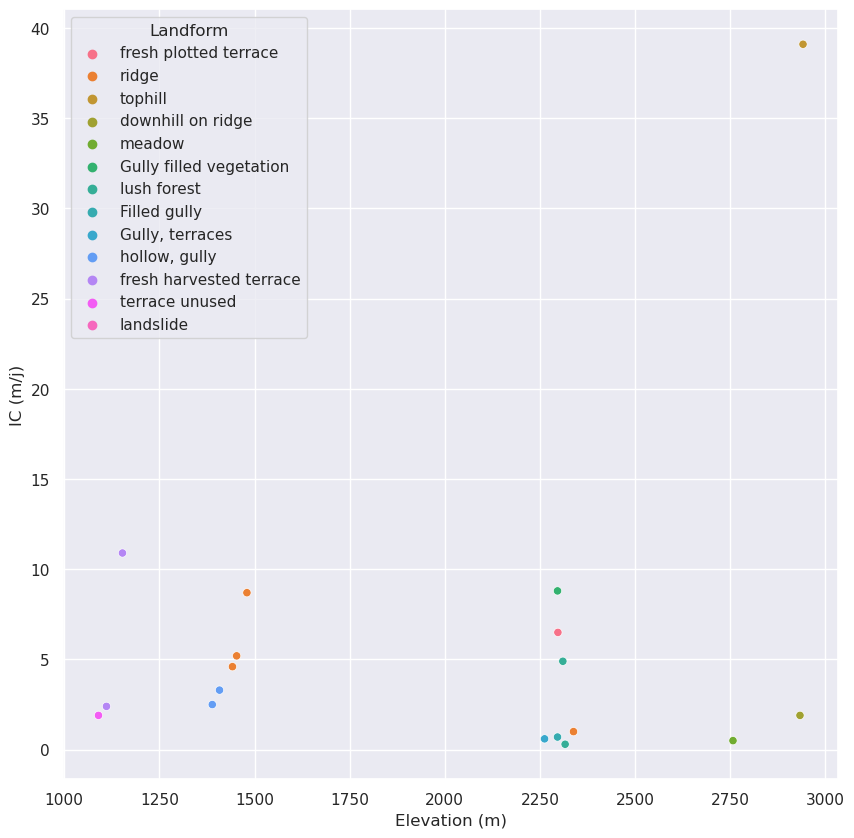

In [5]:
sns.set(rc={'figure.figsize':(10, 10)})
plt.figure()
sns.scatterplot(data=infil, x='Elevation (m)', y='IC (m/j)', hue='Landform')
plt.savefig('../html/figures/infil.png', dpi=300)
plt.show()

### Get processed DEM

In [6]:
grid = Grid.from_raster('./DEM/KauleyKhola.tif')
dem = grid.read_raster('./DEM/KauleyKhola.tif')
dem[dem < 0] = np.nan

### Hill shade
see https://github.com/agilescientific/notebooks/blob/master/Colourmaps.ipynb

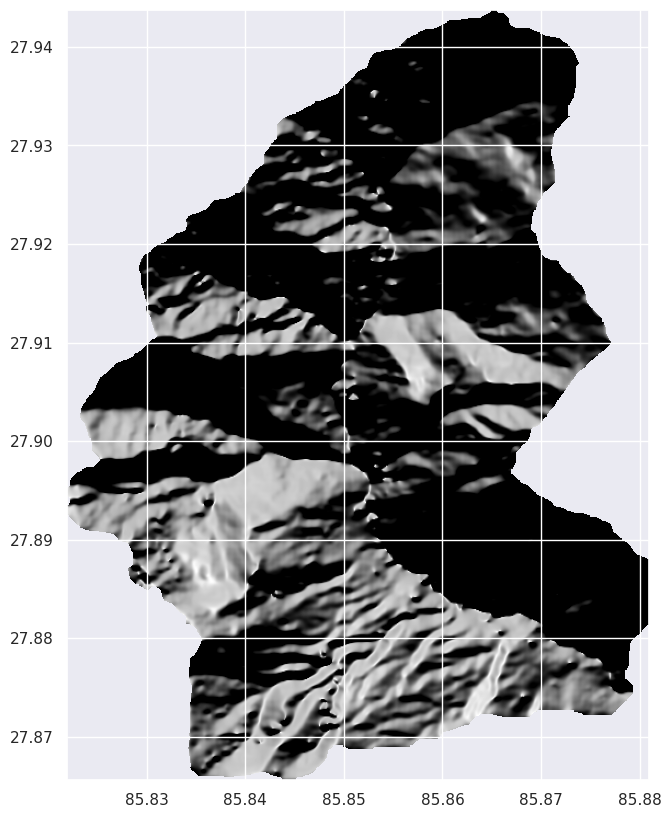

In [7]:
ls = LightSource(azdeg=0, altdeg=45)
bumps = ls.hillshade(dem) #**0.25
plt.imshow(bumps, extent=grid.extent, cmap='gray')

### Contours
see https://github.com/agilescientific/notebooks/blob/master/Colourmaps.ipynb

In [8]:
xlines, inlines = dem.shape
xl, xu, yl, yu = grid.extent

x, y = np.linspace(xl, xu, inlines), np.linspace(yu, yl, xlines)
X, Y = np.meshgrid(x, y)

mi, ma = np.floor(np.nanmin(dem)), np.ceil(np.nanmax(dem))
levels = np.arange(mi, ma, 200)

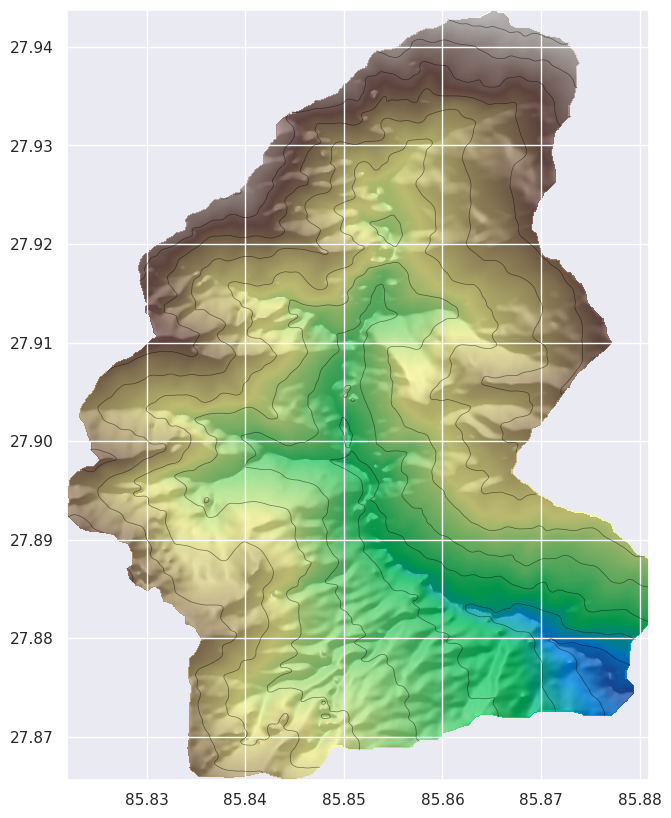

In [9]:
plt.figure()
plt.imshow(dem, extent=grid.extent, cmap='terrain', vmin=1000)
plt.imshow(bumps, extent=grid.extent, cmap='gray', alpha=0.27)
plt.contour(X, Y, dem, levels=levels, linewidths=0.5, colors=[(0,0,0,0.5)])
plt.show()

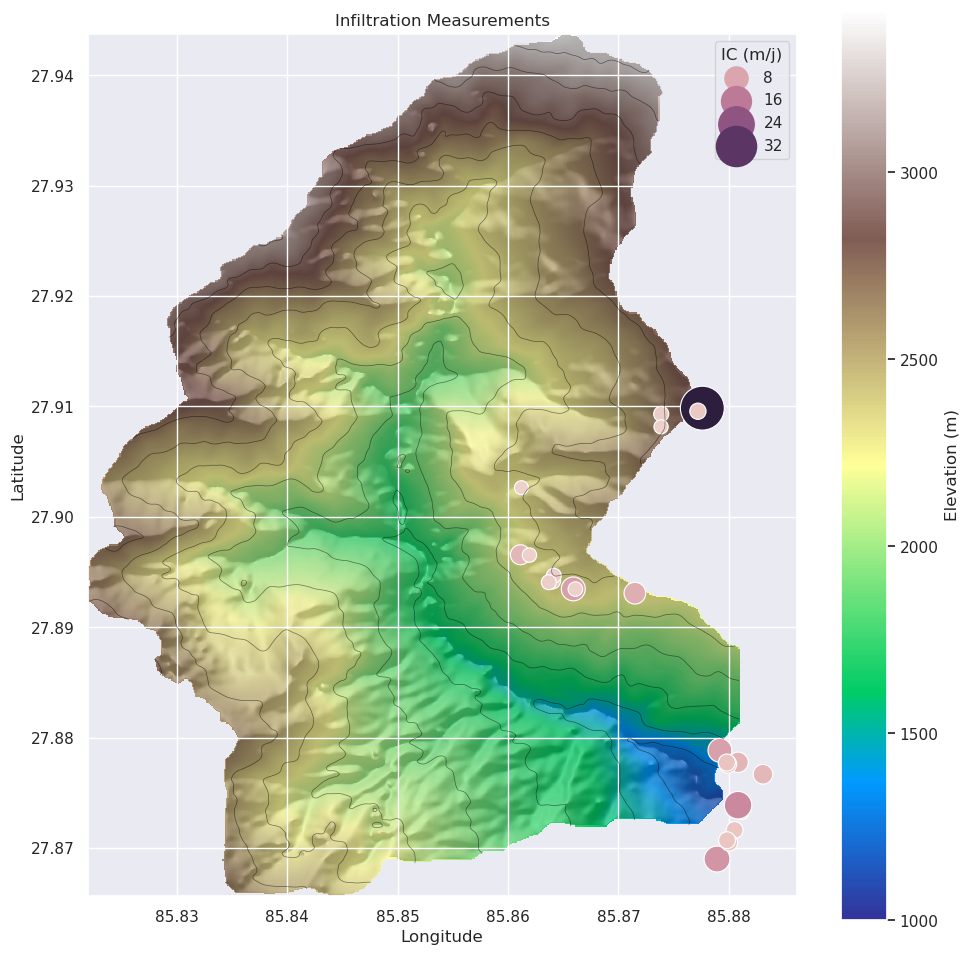

In [10]:
plt.figure()
plt.imshow(dem, extent=grid.extent, cmap='terrain', vmin=1000)
plt.colorbar(label='Elevation (m)')
plt.imshow(bumps, extent=grid.extent, cmap='gray', alpha=0.27)
plt.contour(X, Y, dem, levels=levels, linewidths=0.5, colors=[(0,0,0,0.5)])
sns.scatterplot(data=infil, x='X', y='Y', hue='IC (m/j)', size='IC (m/j)', sizes=(100, 1000))
plt.grid(zorder=0)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Infiltration Measurements')
plt.tight_layout()
plt.savefig('../html/figures/infil-map.png', dpi=300)
plt.show()

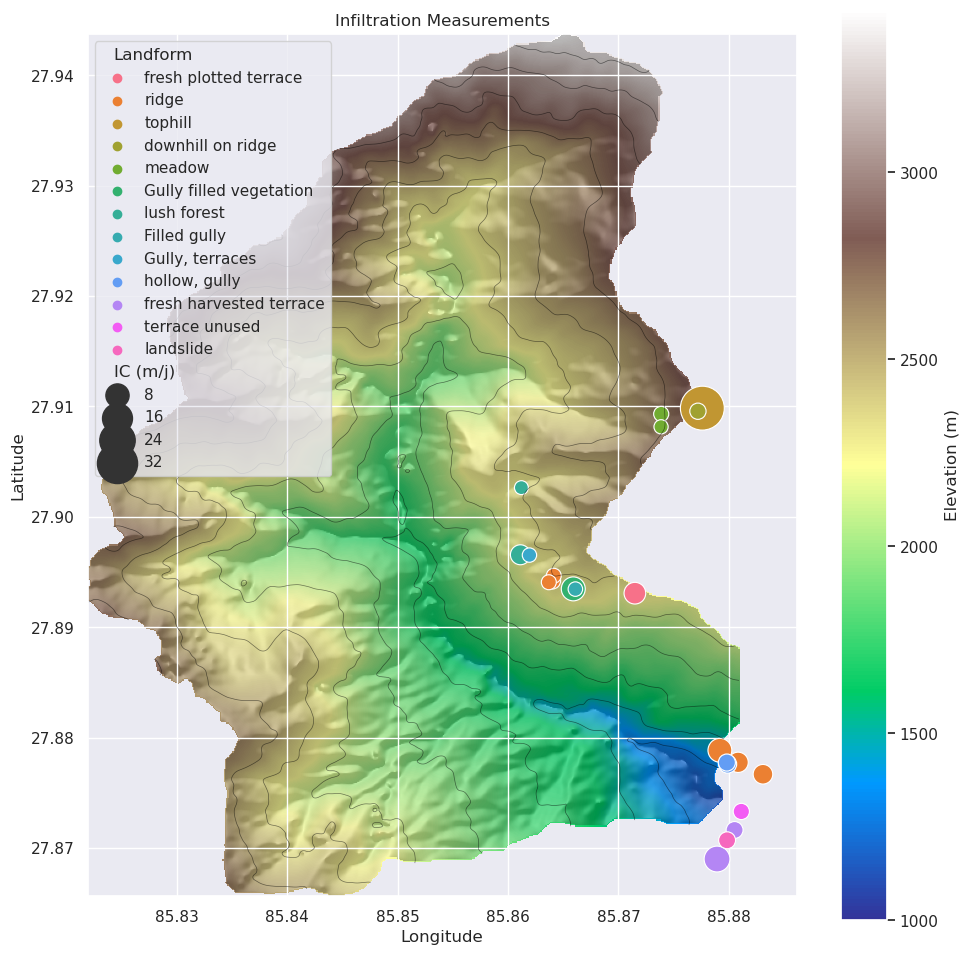

In [11]:
plt.figure()
plt.imshow(dem, extent=grid.extent, cmap='terrain', vmin=1000)
plt.colorbar(label='Elevation (m)')
plt.imshow(bumps, extent=grid.extent, cmap='gray', alpha=0.27)
plt.contour(X, Y, dem, levels=levels, linewidths=0.5, colors=[(0,0,0,0.5)])
sns.scatterplot(data=infil, x='X', y='Y', hue='Landform', size='IC (m/j)', sizes=(100, 1000))
plt.grid(zorder=0)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Infiltration Measurements')
plt.tight_layout()
plt.savefig('../html/figures/infil-type-map.png', dpi=300)
plt.show()

In [12]:
perm = pd.read_csv('./measurements/Permeability (after monsoon).csv', delimiter=';', encoding='latin1')

In [13]:
perm

,Date,Site/ID,X,Y,Elevation (m),Depth (cm),Change in water level per minute (cm/min),Ksat (cm/min),Ksat (cm/h),Ksat (m/j),Q (cm3/min),Q (cm3/h),VWC (%),PER (µS),Landform,Vegetation,Lithology,Description
0,08.11.2022,Listi_ridge,85.86414,27.89467,2334.0,16.0,0.170,0.040,2.370,0.6,15.7500,945.00,17.4\n17.0,1.389\n1.382,ridge,grass exposed to sun. Bushes and trees.,ridge formed from deposits of old lanslide. Mi...,0 - 70cm: brown soil\n60-90cm: weathered quart...
1,NaN,NaN,NaN,NaN,NaN,50.0,0.070,0.018,1.080,0.3,7.3500,441.00,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,150.0,0.300,0.008,0.470,0.1,31.5000,1890.00,NaN,NaN,NaN,NaN,NaN,NaN
3,09.11.2022,Gumba tophill,85.87760,27.90985,2941.0,20.0,0.200,0.051,3.070,0.7,21.0000,1260.00,23.2,1.475,tophill,forest,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,50.0,0.180,0.014,0.830,0.2,18.3750,1102.50,NaN,NaN,NaN,NaN,NaN,NaN
5,09.11.2022,Gumba midpoint ERT,85.87731,27.90976,2933.0,24.0,0.320,0.080,4.800,1.2,32.8125,1968.75,32.1\n30.0,1.613\n1.579,downhill on ridge,"grass, bushes, trees",fractures from Ghorka earthquake,NaN
6,NaN,NaN,NaN,NaN,NaN,40.0,1.000,0.079,4.710,1.1,105.0000,6300.00,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,138.0,1.230,0.092,5.540,1.3,123.3750,7402.50,NaN,NaN,NaN,NaN,NaN,NaN
8,09.11.2022,Meadow,85.87386,27.90816,2757.0,24.0,0.600,0.117,7.040,1.7,63.0000,3780.00,5.4\n30.8\n17.9\n29.7\n33.3,1.197\n1.391\n1.396\n1.572\n1.631,meadow,"grass, bushes",NaN,0cm: Dry brown soil\n0 - 70cm: Wet loamy clay ...
9,NaN,NaN,NaN,NaN,NaN,45.5,0.260,0.024,1.450,0.3,27.5625,1653.75,NaN,NaN,NaN,NaN,NaN,NaN


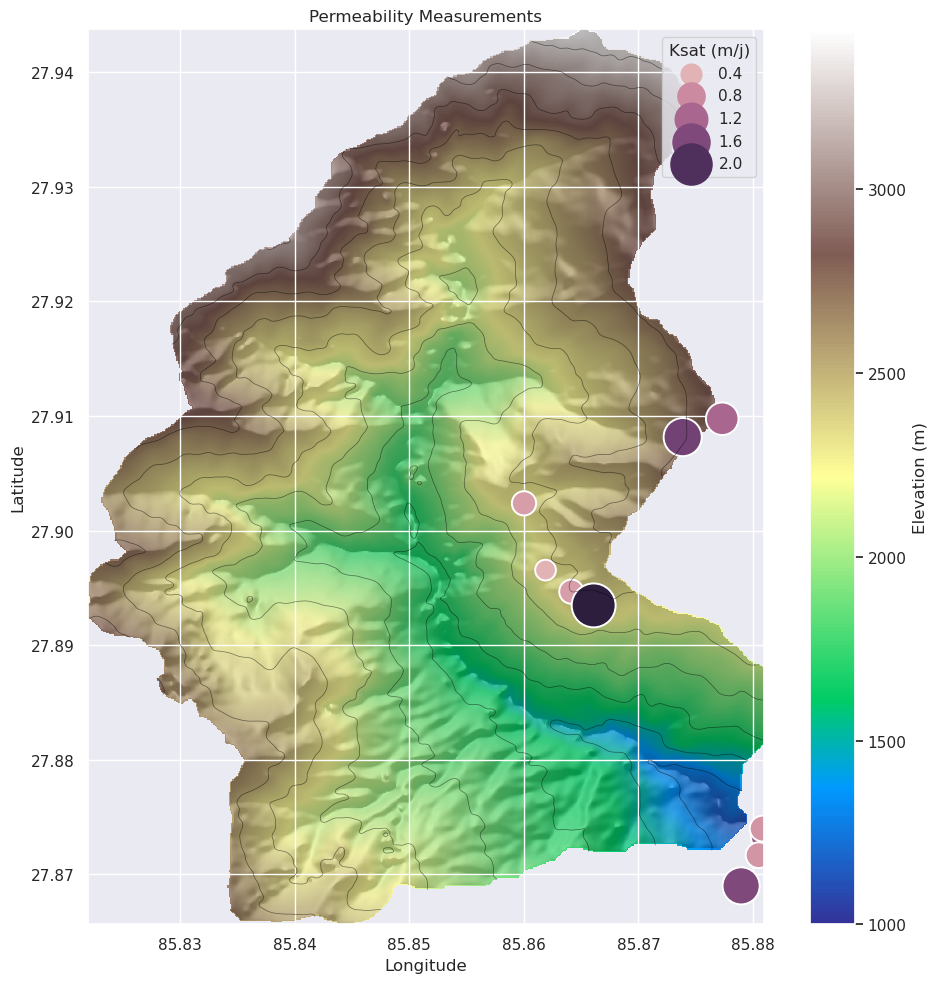

In [14]:
plt.figure()
plt.imshow(dem, extent=grid.extent, cmap='terrain', vmin=1000)
plt.colorbar(label='Elevation (m)')
plt.imshow(bumps, extent=grid.extent, cmap='gray', alpha=0.27)
plt.contour(X, Y, dem, levels=levels, linewidths=0.5, colors=[(0,0,0,0.5)])
sns.scatterplot(data=perm, x='X', y='Y', hue='Ksat (m/j)', size='Ksat (m/j)', sizes=(100, 1000))
plt.grid(zorder=0)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Permeability Measurements')
plt.tight_layout()
plt.savefig('../html/figures/perm-map.png', dpi=300)
plt.show()

In [15]:
springs = pd.read_csv('./measurements/Springs (after monsoon).csv', delimiter=';', encoding='latin1')

In [16]:
tmp = springs['O2 (%)'].values
tmp[tmp>100] = np.nan
springs['Oxygen (%)'] = tmp

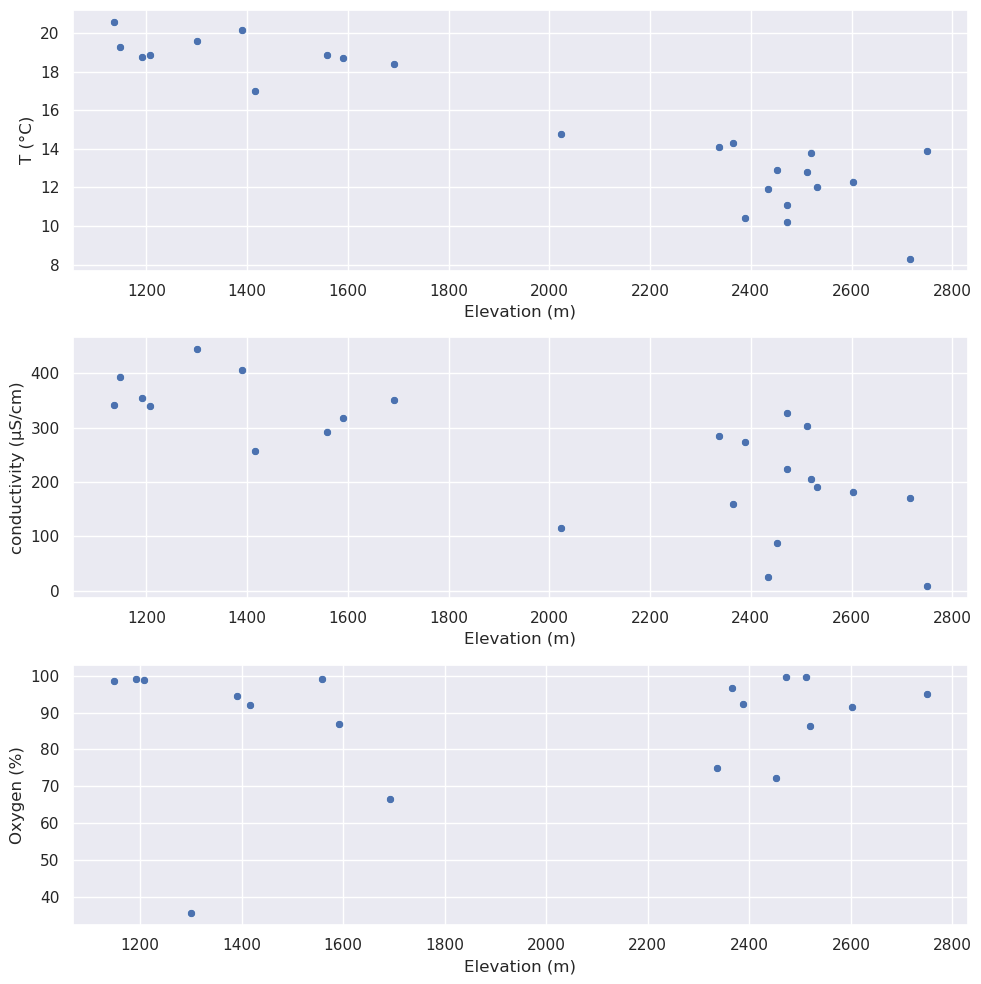

In [17]:
sns.set(rc={'figure.figsize':(10, 10)})
plt.figure()
plt.subplot(3,1,1)
sns.scatterplot(data=springs, x='Elevation (m)', y='T (°C)')
plt.subplot(3,1,2)
sns.scatterplot(data=springs, x='Elevation (m)', y='conductivity (µS/cm)')
plt.subplot(3,1,3)
sns.scatterplot(data=springs, x='Elevation (m)', y='Oxygen (%)')
plt.tight_layout()
plt.savefig('../html/figures/springs.png', dpi=300)
plt.show()

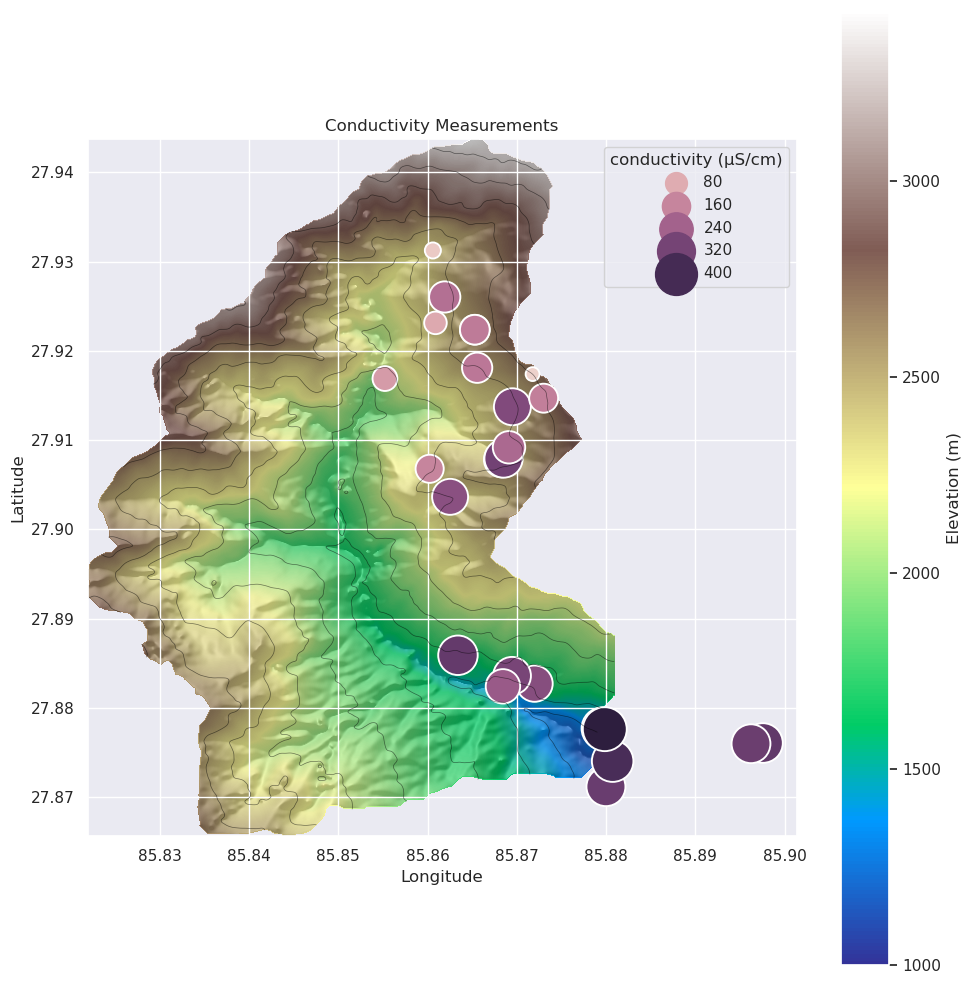

In [18]:
plt.figure()
plt.imshow(dem, extent=grid.extent, cmap='terrain', vmin=1000)
plt.colorbar(label='Elevation (m)')
plt.imshow(bumps, extent=grid.extent, cmap='gray', alpha=0.27)
plt.contour(X, Y, dem, levels=levels, linewidths=0.5, colors=[(0,0,0,0.5)])
sns.scatterplot(data=springs, x='X', y='Y', hue='conductivity (µS/cm)', size='conductivity (µS/cm)', sizes=(100, 1000))
plt.grid(zorder=0)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Conductivity Measurements')
plt.tight_layout()
plt.savefig('../html/figures/conduct.png', dpi=300)
plt.show()

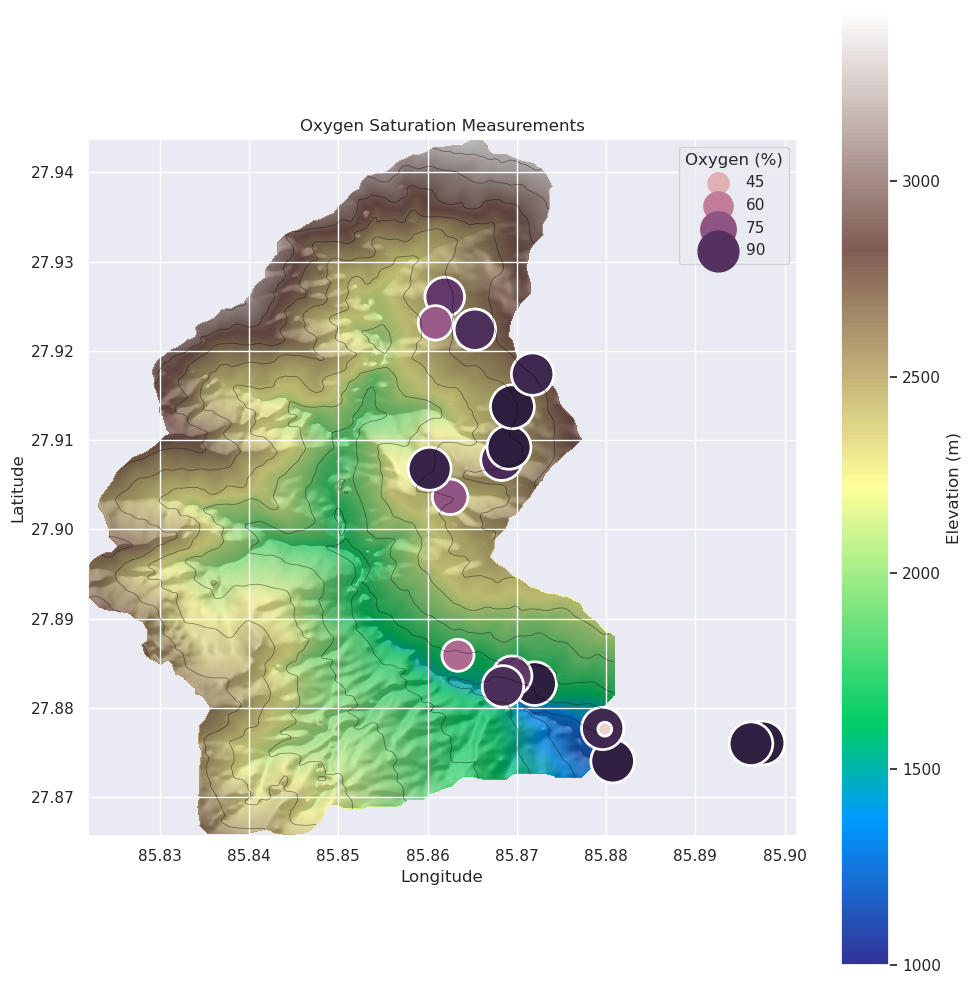

In [19]:
plt.figure()
plt.imshow(dem, extent=grid.extent, cmap='terrain', vmin=1000)
plt.colorbar(label='Elevation (m)')
plt.imshow(bumps, extent=grid.extent, cmap='gray', alpha=0.27)
plt.contour(X, Y, dem, levels=levels, linewidths=0.5, colors=[(0,0,0,0.5)])
sns.scatterplot(data=springs, x='X', y='Y', hue='Oxygen (%)', size='Oxygen (%)', sizes=(100, 1000))
plt.grid(zorder=0)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Oxygen Saturation Measurements')
plt.tight_layout()
plt.savefig('../html/figures/oxygen.png', dpi=300)
plt.show()